# COVID-19 Argentina

In [289]:
import os              # This provides several system utilities
import pandas as pd    # This is the workhorse of data munging in Python
import matplotlib.pyplot as plt
import seaborn as sns  # This allows us to easily and beautifully plot

# This ensures visualizations are plotted inside the notebook
%matplotlib inline

### Abro archivo

In [290]:
f = 'Covid19_Arg.txt'    # Path to file containing the table
df = pd.read_csv(f)    # Read the table in

In [291]:
df.set_index(pd.DatetimeIndex(df['Fecha']),inplace=True)
df.drop('Fecha', axis=1, inplace=True)
df['Recuperados_tot'] = pd.to_numeric(df['Recuperados_tot'])

df.tail

<bound method NDFrame.tail of             Contagios  Muertos  Recuperados_tot  Tests
Fecha                                                 
2020-03-05          1        0              nan    nan
2020-03-06          1        0              nan    nan
2020-03-07          7        0              nan    nan
2020-03-08          3        0              nan    nan
2020-03-09          5        1              nan    nan
2020-03-10          2        0              nan    nan
2020-03-11          2        0              nan    nan
2020-03-12         10        0              nan    nan
2020-03-13          3        0              nan    nan
2020-03-14         11        1              nan    nan
2020-03-15         11        0              nan    nan
2020-03-16          9        0              nan    nan
2020-03-17         13        0              nan    nan
2020-03-18         19        0              nan    nan
2020-03-19         31        1              nan    nan
2020-03-20         30        0     

In [292]:
df['Recuperados'] = df['Recuperados_tot'].diff()
df['Tests_diario'] = df['Tests'].diff()
df['Activos']=df['Contagios']-df['Recuperados']-df['Muertos']
df['Activos'] = pd.to_numeric(df['Activos'])
df.tail

<bound method NDFrame.tail of             Contagios  Muertos  Recuperados_tot  Tests  Recuperados  \
Fecha                                                                 
2020-03-05          1        0              nan    nan          nan   
2020-03-06          1        0              nan    nan          nan   
2020-03-07          7        0              nan    nan          nan   
2020-03-08          3        0              nan    nan          nan   
2020-03-09          5        1              nan    nan          nan   
2020-03-10          2        0              nan    nan          nan   
2020-03-11          2        0              nan    nan          nan   
2020-03-12         10        0              nan    nan          nan   
2020-03-13          3        0              nan    nan          nan   
2020-03-14         11        1              nan    nan          nan   
2020-03-15         11        0              nan    nan          nan   
2020-03-16          9        0              nan

In [293]:
df['Contagios_tot'] = df['Contagios'].cumsum()
df['Muertos_tot'] = df['Muertos'].cumsum()
#df['Recuperados_tot'] = df['Recuperados'].cumsum()
df['Activos_tot']=df['Contagios_tot']-df['Recuperados_tot']-df['Muertos_tot']
df.head()
pd.options.display.float_format = '{:,.0f}'.format
df.tail

<bound method NDFrame.tail of             Contagios  Muertos  Recuperados_tot  Tests  Recuperados  \
Fecha                                                                 
2020-03-05          1        0              nan    nan          nan   
2020-03-06          1        0              nan    nan          nan   
2020-03-07          7        0              nan    nan          nan   
2020-03-08          3        0              nan    nan          nan   
2020-03-09          5        1              nan    nan          nan   
2020-03-10          2        0              nan    nan          nan   
2020-03-11          2        0              nan    nan          nan   
2020-03-12         10        0              nan    nan          nan   
2020-03-13          3        0              nan    nan          nan   
2020-03-14         11        1              nan    nan          nan   
2020-03-15         11        0              nan    nan          nan   
2020-03-16          9        0              nan

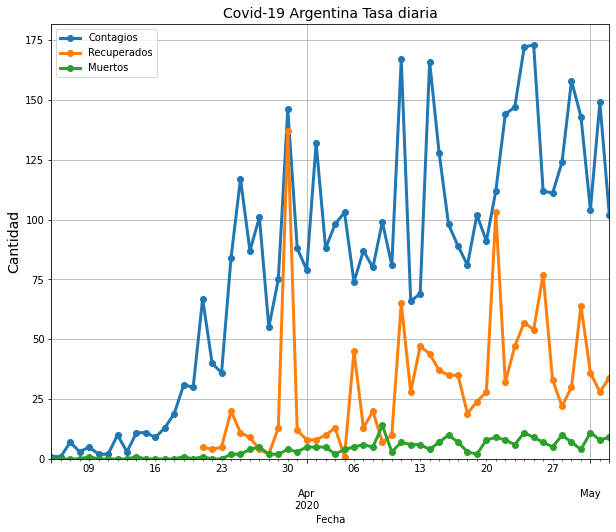

In [294]:
ax=df.plot(y=['Contagios','Recuperados','Muertos'], legend='true',style='-',grid='on',figsize=(10,8),linewidth=3, marker='o')
#df.Muertos.plot(kind='line', legend='true',style='.-',grid='on')#df.plot.bar()#stacked='true')
#df.Recuperados.plot(kind='line', legend='true',style='.-',grid='on')#df.plot.bar()#stacked='true')
#df.Activos.plot(kind='line', legend='true',style='.-',grid='on')#df.plot.bar()#stacked='true')
plt.title('Covid-19 Argentina Tasa diaria',fontsize=14)
plt.legend(['Contagios', 'Recuperados',"Muertos"],loc='upper left');
plt.ylabel('Cantidad', fontsize=14)

#agrega ultimo numero
#for var in (df.Contagios,df.Recuperados,df.Muertos):
#    plt.annotate('%d' % var.iloc[-1], xy=(1, var.max()), xytext=(8, 0), 
#                 xycoords=('axes fraction', 'data'), textcoords='offset points')

plt.gca().set_ylim(bottom=0)

name='Graficos/TasaDiariaLine_'+df.index[-1].strftime("%d%b")#str(df.index[-1])+'.png'
plt.savefig(name)

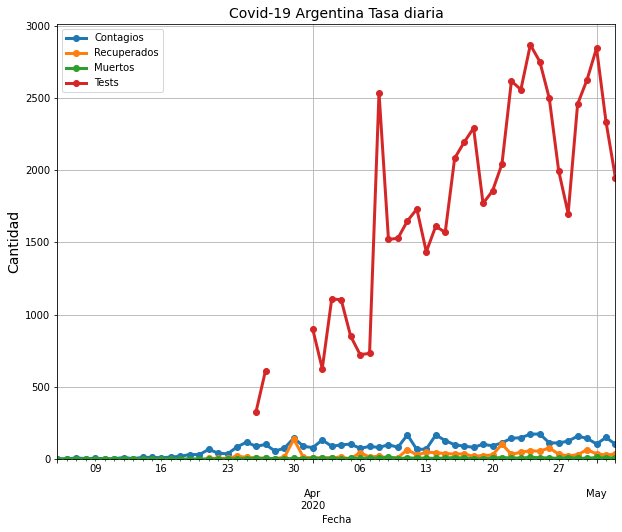

In [295]:
ax=df.plot(y=['Contagios','Recuperados','Muertos','Tests_diario'], legend='true',style='-',grid='on',figsize=(10,8),linewidth=3, marker='o')
#df.Muertos.plot(kind='line', legend='true',style='.-',grid='on')#df.plot.bar()#stacked='true')
#df.Recuperados.plot(kind='line', legend='true',style='.-',grid='on')#df.plot.bar()#stacked='true')
#df.Activos.plot(kind='line', legend='true',style='.-',grid='on')#df.plot.bar()#stacked='true')
plt.title('Covid-19 Argentina Tasa diaria',fontsize=14)
plt.legend(['Contagios', 'Recuperados',"Muertos","Tests"],loc='upper left');
plt.ylabel('Cantidad', fontsize=14)

#agrega ultimo numero
#for var in (df.Contagios,df.Recuperados,df.Muertos):
#    plt.annotate('%d' % var.iloc[-1], xy=(1, var.max()), xytext=(8, 0), 
#                 xycoords=('axes fraction', 'data'), textcoords='offset points')

plt.gca().set_ylim(bottom=0)

name='Graficos/TasaDiariaFullLine_'+df.index[-1].strftime("%d%b")#str(df.index[-1])+'.png'
plt.savefig(name)

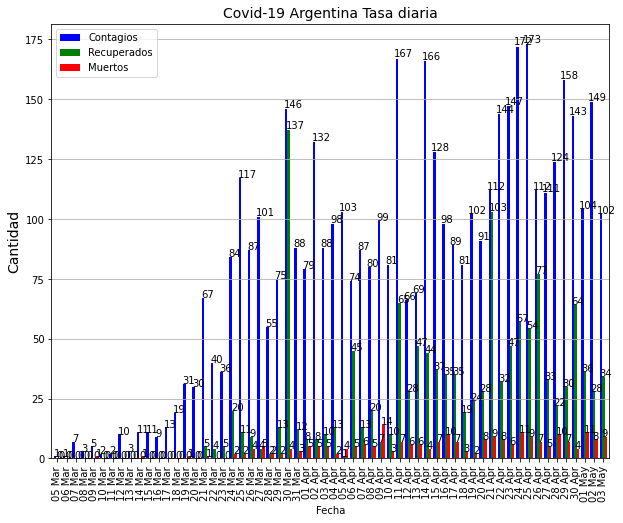

In [296]:
ax=df.plot.bar(y=['Contagios','Recuperados','Muertos'],color=['blue','green','red'],width=0.8, legend='true',figsize=(10,8))
plt.gca().xaxis.set_major_formatter(plt.FixedFormatter(df.index.to_series().dt.strftime("%d %b")))#arregla la fecha
plt.grid(axis='y')
plt.title('Covid-19 Argentina Tasa diaria',fontsize=14)
#plt.xlabel('Fecha', fontsize=14)
plt.ylabel('Cantidad', fontsize=14)

#numeros arriba de la barra
for p in ax.patches:
    ax.annotate(int(p.get_height()), (p.get_x() * 0.995, p.get_height() * 1.005))

name='Graficos/TasaDiariaBar_'+df.index[-1].strftime("%d%b")#str(df.index[-1])+'.png'
plt.savefig(name)

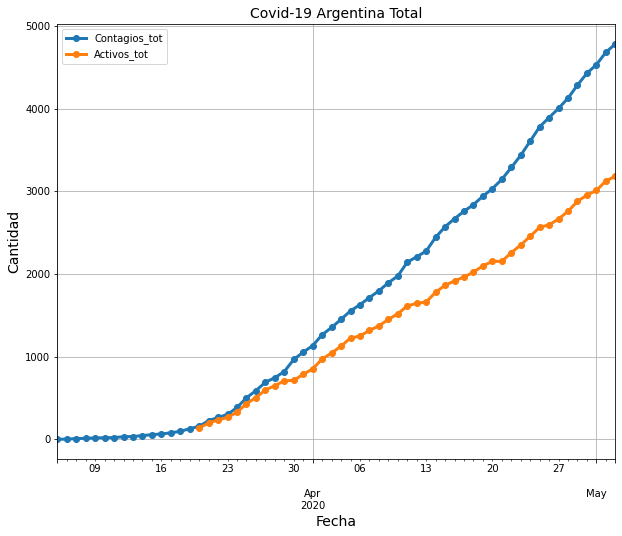

In [297]:
ax=df.plot(y=['Contagios_tot','Activos_tot'], style='-',grid='on',figsize=(10,8),linewidth=3, marker='o')
plt.title('Covid-19 Argentina Total',fontsize=14)
plt.xlabel('Fecha', fontsize=14)
plt.ylabel('Cantidad', fontsize=14)

#numeros arriba de la barra
for p in ax.patches:
    ax.annotate(int(p.get_height()), (p.get_x() * 1.005, p.get_height() * 1.005))


name='Graficos/Contagios_tot_'+df.index[-1].strftime("%d%b")#str(df.index[-1])+'.png'
plt.savefig(name)

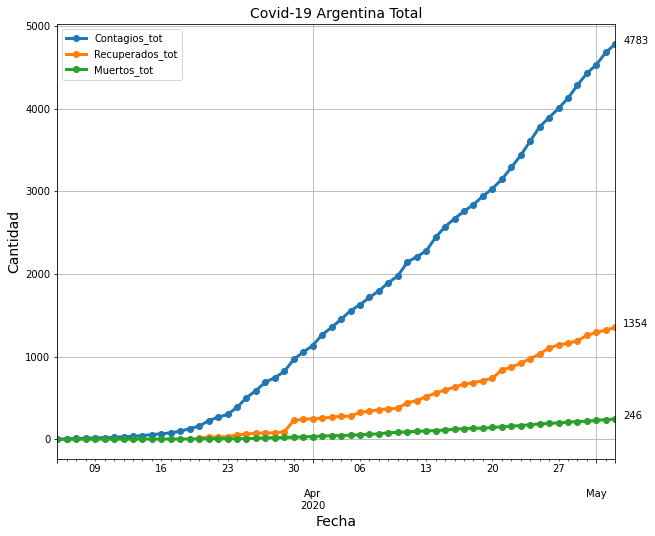

In [298]:
ax=df.plot(y=['Contagios_tot','Recuperados_tot','Muertos_tot'], style='-',grid='on',figsize=(10,8),linewidth=3, marker='o')
plt.title('Covid-19 Argentina Total',fontsize=14)
plt.xlabel('Fecha', fontsize=14)
plt.ylabel('Cantidad', fontsize=14)
plt.legend(loc='upper left');
#numeros arriba de la barra
#for p in ax.patches:
#    ax.annotate(int(p.get_height()), (p.get_x() * 1.005, p.get_height() * 1.005))

#agrega ultimo numero
for var in (df.Contagios_tot,df.Recuperados_tot,df.Muertos_tot):
    plt.annotate('%d' % var.max(), xy=(1, var.max()), xytext=(8, 0), 
                 xycoords=('axes fraction', 'data'), textcoords='offset points')

name='Graficos/Contagios_tot_'+df.index[-1].strftime("%d%b")#str(df.index[-1])+'.png'
plt.savefig(name)

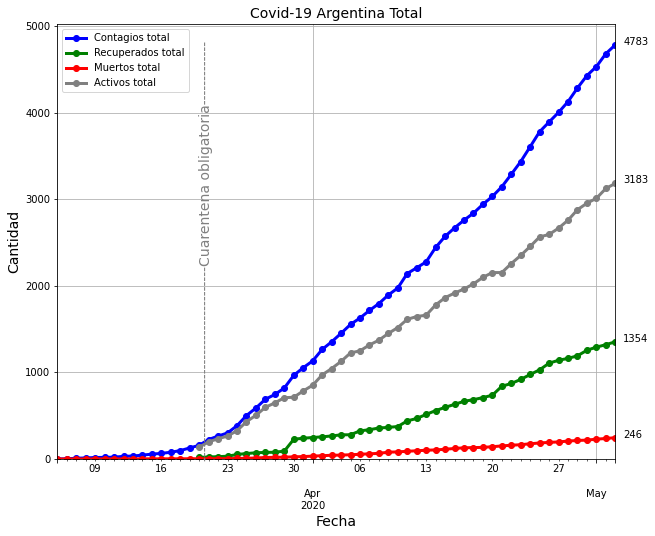

In [299]:
import matplotlib.ticker as mticker
ax=df.plot(y=['Contagios_tot','Recuperados_tot','Muertos_tot',"Activos_tot"],color=['blue',"green",'red','grey'], style='-',grid='on',figsize=(10,8),linewidth=3, marker='o')
plt.title('Covid-19 Argentina Total',fontsize=14)
plt.xlabel('Fecha', fontsize=14)
plt.ylabel('Cantidad', fontsize=14)
plt.legend(['Contagios total','Recuperados total','Muertos total',"Activos total"],loc='upper left');
#ax.yaxis.set_major_formatter(mticker.ScalarFormatter())

for var in (df.Contagios_tot,df.Recuperados_tot,df.Muertos_tot,df.Activos_tot):
    plt.annotate('%d' % var.max(), xy=(1, var.max()), xytext=(8, 0), 
                 xycoords=('axes fraction', 'data'), textcoords='offset points')
# Add labels to the plot
style = dict(size=14, color='gray')

ax.text('2020-3-20', 10, "----------------------------------------Cuarentena obligatoria-------------",rotation=90, **style)
plt.gca().set_ylim(bottom=0)

name='Graficos/Contagios_tot_'+df.index[-1].strftime("%d%b")#str(df.index[-1])+'.png'
plt.savefig(name)

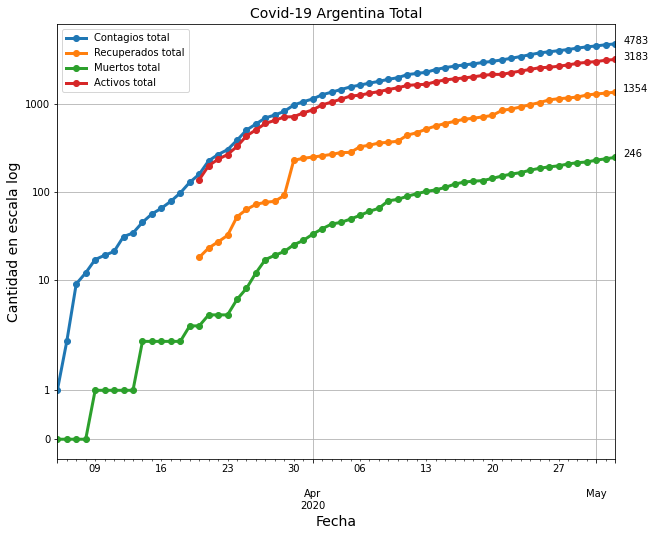

In [300]:
import matplotlib.ticker as mticker
ax=df.plot(y=['Contagios_tot','Recuperados_tot','Muertos_tot',"Activos_tot"],logy="sym", style='-',grid='on',figsize=(10,8),linewidth=3, marker='o')
plt.title('Covid-19 Argentina Total',fontsize=14)
plt.xlabel('Fecha', fontsize=14)
plt.ylabel('Cantidad en escala log', fontsize=14)
plt.legend(['Contagios total','Recuperados total','Muertos total',"Activos total"],loc='upper left');
ax.yaxis.set_major_formatter(mticker.ScalarFormatter())

for var in (df.Contagios_tot,df.Recuperados_tot,df.Muertos_tot,df.Activos_tot):
    plt.annotate('%d' % var.max(), xy=(1, var.max()), xytext=(8, 0), 
                 xycoords=('axes fraction', 'data'), textcoords='offset points')

name='Graficos/Contagios_tot_log'+df.index[-1].strftime("%d%b")#str(df.index[-1])+'.png'
plt.savefig(name)

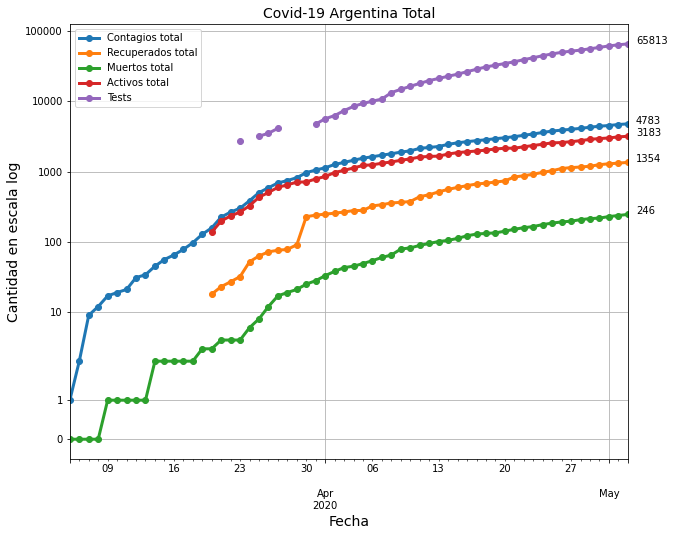

In [301]:
import matplotlib.ticker as mticker
ax=df.plot(y=['Contagios_tot','Recuperados_tot','Muertos_tot',"Activos_tot","Tests"],logy="sym", style='-',grid='on',figsize=(10,8),linewidth=3, marker='o')
plt.title('Covid-19 Argentina Total',fontsize=14)
plt.xlabel('Fecha', fontsize=14)
plt.ylabel('Cantidad en escala log', fontsize=14)
plt.legend(['Contagios total','Recuperados total','Muertos total',"Activos total","Tests"],loc='upper left');
ax.yaxis.set_major_formatter(mticker.ScalarFormatter())

for var in (df.Contagios_tot,df.Recuperados_tot,df.Muertos_tot,df.Activos_tot,df.Tests):
    plt.annotate('%d' % var.max(), xy=(1, var.max()), xytext=(8, 0), 
                 xycoords=('axes fraction', 'data'), textcoords='offset points')

name='Graficos/Contagios_totTests_log'+df.index[-1].strftime("%d%b")#str(df.index[-1])+'.png'
plt.savefig(name)

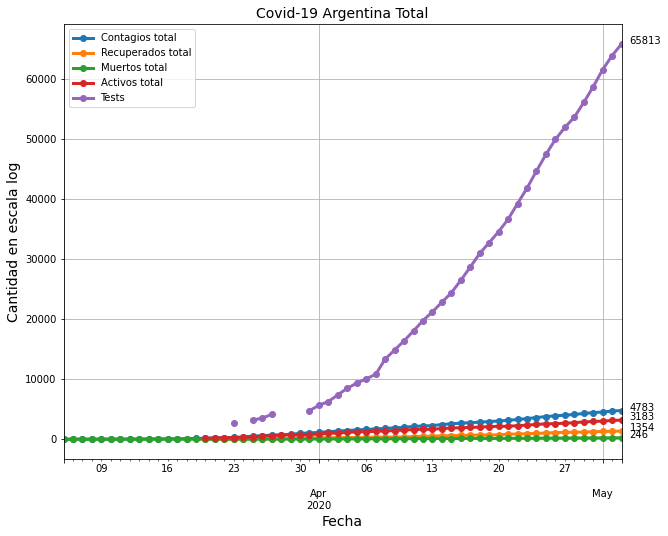

In [302]:
import matplotlib.ticker as mticker
ax=df.plot(y=['Contagios_tot','Recuperados_tot','Muertos_tot',"Activos_tot","Tests"], style='-',grid='on',figsize=(10,8),linewidth=3, marker='o')
plt.title('Covid-19 Argentina Total',fontsize=14)
plt.xlabel('Fecha', fontsize=14)
plt.ylabel('Cantidad en escala log', fontsize=14)
plt.legend(['Contagios total','Recuperados total','Muertos total',"Activos total","Tests"],loc='upper left');
ax.yaxis.set_major_formatter(mticker.ScalarFormatter())

for var in (df.Contagios_tot,df.Recuperados_tot,df.Muertos_tot,df.Activos_tot,df.Tests):
    plt.annotate('%d' % var.max(), xy=(1, var.max()), xytext=(8, 0), 
                 xycoords=('axes fraction', 'data'), textcoords='offset points')


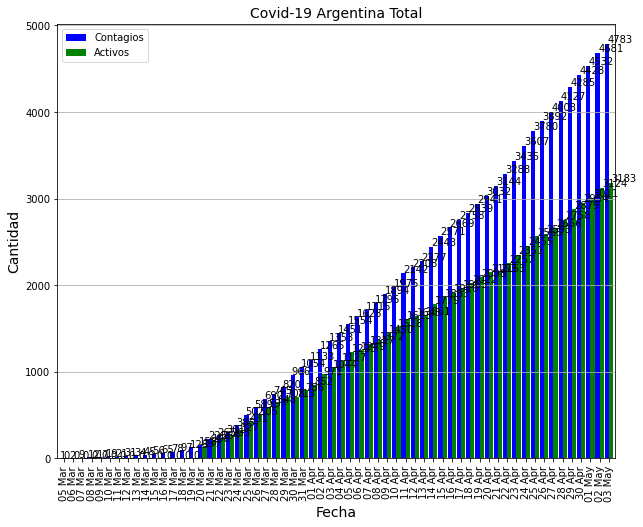

In [303]:
ax=df.plot.bar(y=['Contagios_tot','Activos_tot'],color=['blue','green'],figsize=(10,8),width=0.9)
plt.gca().xaxis.set_major_formatter(plt.FixedFormatter(df.index.to_series().dt.strftime("%d %b")))

plt.title('Covid-19 Argentina Total',fontsize=14)
plt.xlabel('Fecha', fontsize=14)
plt.ylabel('Cantidad', fontsize=14)
plt.legend(['Contagios', "Activos"],loc='upper left');
plt.grid(axis='y')

#numeros arriba de la barra
for p in ax.patches:
    ax.annotate(int(p.get_height()), (p.get_x() * 1.005, p.get_height() * 1.005))

name='Graficos/Contagios_totBar_'+df.index[-1].strftime("%d%b")#str(df.index[-1])+'.png'
#plt.savefig(name)

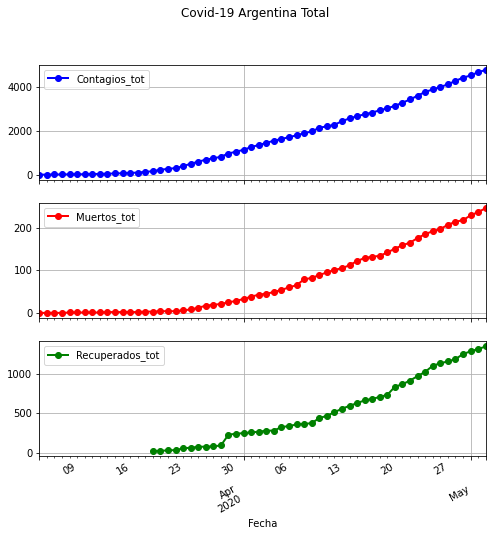

In [304]:
df.plot(y=['Contagios_tot','Muertos_tot', 'Recuperados_tot'],color=['blue','red','green'],figsize=(8,8),subplots='true',style='.-',grid='on',title='Covid-19 Argentina Total',linewidth=2, marker='o')#df[df['Contagios_tot'] > 100]

name='Graficos/Contagios_tot100_'+df.index[-1].strftime("%d%b")#str(df.index[-1])+'.png'
plt.savefig(name)

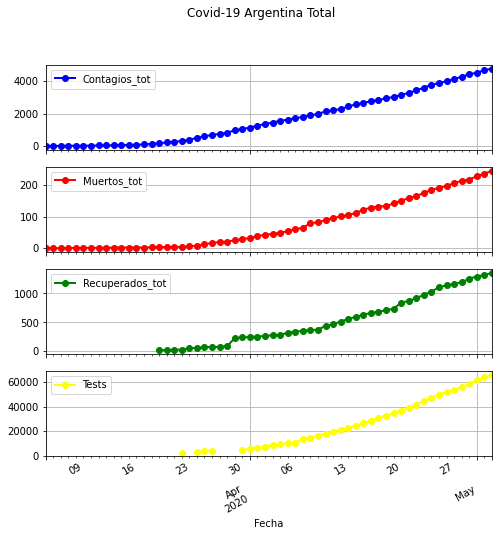

In [305]:
df.plot(y=['Contagios_tot','Muertos_tot', 'Recuperados_tot',"Tests"],color=['blue','red','green','yellow'],figsize=(8,8),subplots='true',style='.-',grid='on',title='Covid-19 Argentina Total',linewidth=2, marker='o')#df[df['Contagios_tot'] > 100]

name='Graficos/Todos_tot_'+df.index[-1].strftime("%d%b")#str(df.index[-1])+'.png'
plt.savefig(name)

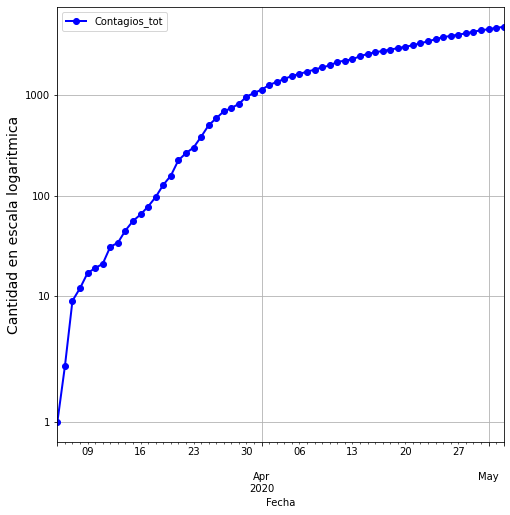

In [306]:
ax=df.plot(y=['Contagios_tot'],color=['blue'],figsize=(8,8),style='.-',grid='on',linewidth=2,logy="sym", marker='o')#df[df['Muertos_tot'] > 10]
plt.ylabel('Cantidad en escala logaritmica', fontsize=14)
ax.yaxis.set_major_formatter(mticker.ScalarFormatter())

name='Graficos/Contagios_tot_log_'+df.index[-1].strftime("%d%b")#str(df.index[-1])+'.png'
plt.savefig(name)

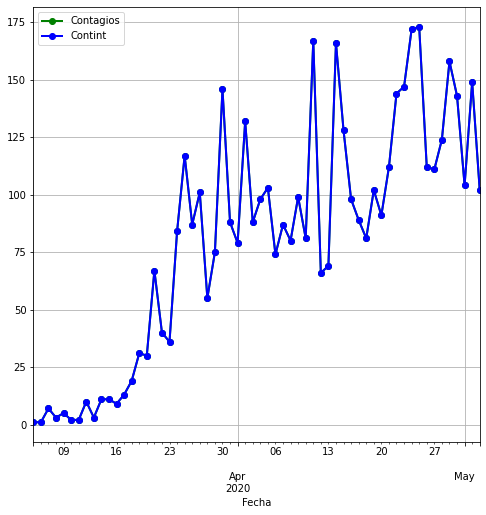

In [307]:
df['Contint']=df.Contagios.interpolate(method='quadratic')
df.plot(y=['Contagios','Contint'],color=['green','blue'],figsize=(8,8),style='.-',grid='on',linewidth=2, marker='o')

Text(0, 0.5, 'Cantidad')

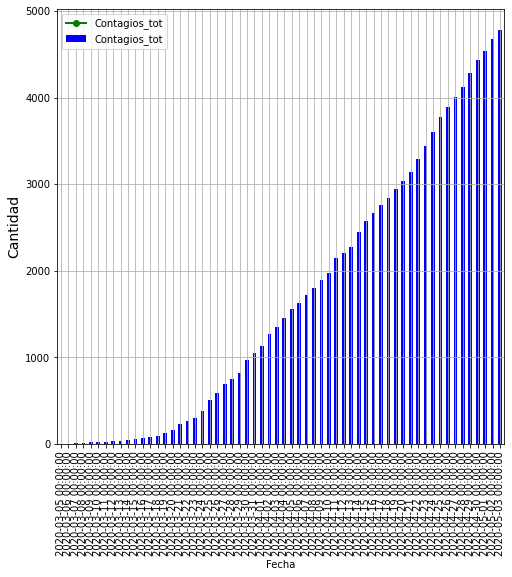

In [308]:
ax=df.plot(y='Contagios_tot',kind='line',color='green',figsize=(8,8),style='.-',grid='on',linewidth=2, marker='o')
ax.yaxis.set_major_formatter(mticker.ScalarFormatter())

df.plot(y='Contagios_tot',kind='bar',color='blue',figsize=(8,8),style='.-',grid='on',linewidth=2,ax=ax)
ax.yaxis.set_major_formatter(mticker.ScalarFormatter())
plt.ylabel('Cantidad', fontsize=14)

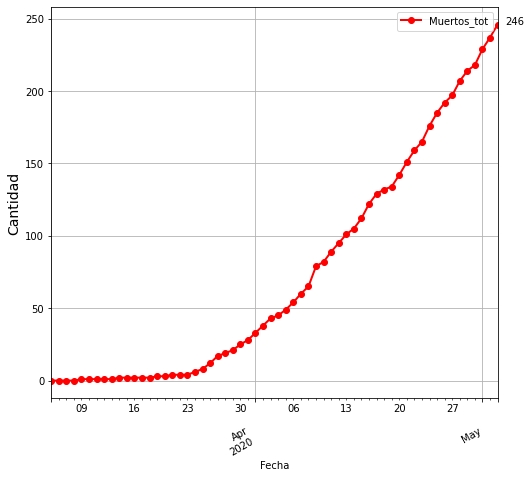

In [309]:
ax=df.plot(y=['Muertos_tot'],color=['red'],figsize=(8,8),subplots='true',style='.-',grid='on',linewidth=2, marker='o')#df[df['Muertos_tot'] > 10]
plt.ylabel('Cantidad', fontsize=14)
plt.annotate('%d' % df.Muertos_tot.max(), xy=(1, df.Muertos_tot.max()), xytext=(8, 0), 
                 xycoords=('axes fraction', 'data'), textcoords='offset points')
name='Graficos/Muertos_tot10_'+df.index[-1].strftime("%d%b")#str(df.index[-1])+'.png'
plt.savefig(name)

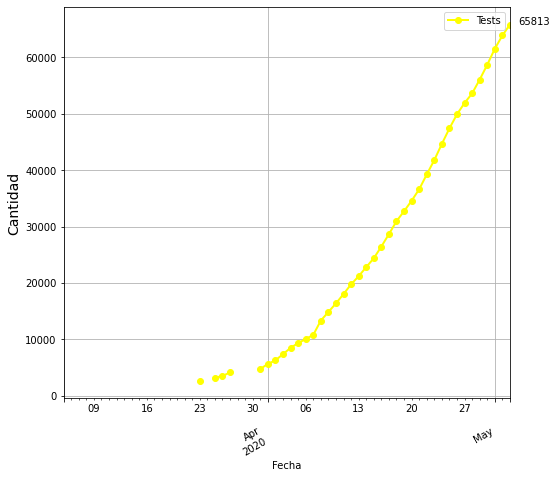

In [310]:
ax=df.plot(y=['Tests'],color=['yellow'],figsize=(8,8),subplots='true',style='.-',grid='on',linewidth=2, marker='o')#df[df['Muertos_tot'] > 10]
plt.ylabel('Cantidad', fontsize=14)
plt.annotate('%d' % df.Tests.max(), xy=(1, df.Tests.max()), xytext=(8, 0), 
                 xycoords=('axes fraction', 'data'), textcoords='offset points')
name='Graficos/Test_tot_'+df.index[-1].strftime("%d%b")#str(df.index[-1])+'.png'
plt.savefig(name)

In [311]:
df.describe()

,Contagios,Muertos,Recuperados_tot,Tests,Recuperados,Tests_diario,Activos,Contagios_tot,Muertos_tot,Activos_tot,Contint
count,60,60,45,38,44,35,44,60,60,45,60
mean,80,4,546,"27,667",30,"1,771",69,"1,682",74,"1,585",80
std,52,4,423,"20,053",28,722,31,"1,538",79,902,52
min,1,0,18,"2,695",1,328,0,1,0,137,1
25%,31,1,240,"9,520",10,"1,272",54,150,3,786,31
50%,87,4,440,"23,590",26,"1,770",70,"1,402",44,"1,613",87
75%,112,7,872,"43,937",39,"2,397",92,"2,864",132,"2,257",112
max,173,14,"1,354","65,813",137,"2,868",121,"4,783",246,"3,183",173


In [312]:
name='csv _datos_completos/Covid_arg_completo'+df.index[-1].strftime("%d%b")+'.csv'#str(df.index[-1])
df.to_csv(name, index=True)

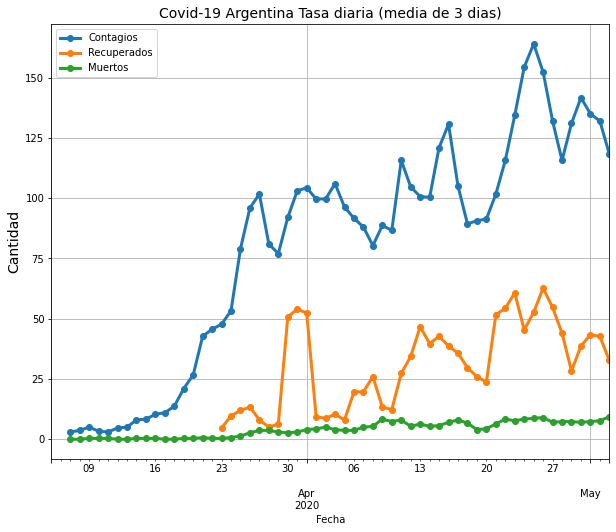

In [313]:
import numpy as np
N=3
df["Contagios_MA"]=df.Contagios.rolling(window=N).mean()
df["Recuperados_MA"]=df.Recuperados.rolling(window=N).mean()
df["Muertos_MA"]=df.Muertos.rolling(window=N).mean()
ax=df.plot(y=['Contagios_MA','Recuperados_MA','Muertos_MA'], legend='true',style='-',grid='on',figsize=(10,8),linewidth=3, marker='o')
plt.title('Covid-19 Argentina Tasa diaria (media de 3 dias)',fontsize=14)
plt.legend(['Contagios', 'Recuperados',"Muertos"],loc='upper left');
plt.ylabel('Cantidad', fontsize=14)
name='Graficos/TasaDiariaMA_'+df.index[-1].strftime("%d%b")#str(df.index[-1])+'.png'
#plt.savefig(name)
#df.Contagios_MA.plot()
#plt.plot(df.Contagios_tot.rolling(window=N).mean())
#df.Contagios_tot.plot(style='.')
#plt.plot(df.Contagios.rolling(window=N).mean(),ax=ax)
#df.Contagios.plot(style='.')

#plt.legend(['MA(3)','Contagios_tot'],loc='upper left');

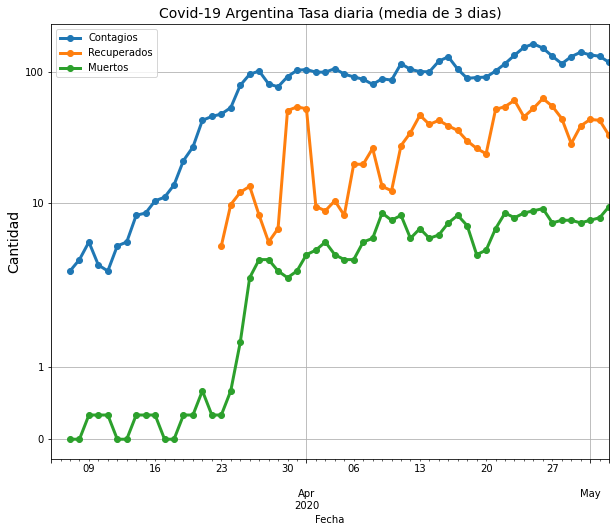

In [314]:
ax=df.plot(y=['Contagios_MA','Recuperados_MA','Muertos_MA'], legend='true',style='-',grid='on',logy='sym',figsize=(10,8),linewidth=3, marker='o')
ax.yaxis.set_major_formatter(mticker.ScalarFormatter())
plt.title('Covid-19 Argentina Tasa diaria (media de 3 dias)',fontsize=14)
plt.legend(['Contagios', 'Recuperados',"Muertos"],loc='upper left');
plt.ylabel('Cantidad', fontsize=14)
name='Graficos/TasaDiariaMA_log_'+df.index[-1].strftime("%d%b")#str(df.index[-1])+'.png'
#plt.savefig(name)

## Animation

In [315]:
'''import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.animation as animation
overdoses = pd.read_excel('overdose_data_1999-2015.xls',sheetname='Online',skiprows =6)
def get_data(table,rownum,title):
    data = pd.DataFrame(table.loc[rownum][2:]).astype(float)
    data.columns = {title}
    return data

%matplotlib notebook
title = 'Heroin Overdoses'
d = get_data(overdoses,18,title)
x = np.array(d.index)
y = np.array(d['Heroin Overdoses'])
overdose = pd.DataFrame(y,x)
#XN,YN = augment(x,y,10)
#augmented = pd.DataFrame(YN,XN)
overdose.columns = {title}

Writer = animation.writers['ffmpeg']
writer = Writer(fps=20, metadata=dict(artist='Me'), bitrate=1800)
fig = plt.figure(figsize=(10,6))
plt.xlim(1999, 2016)
plt.ylim(np.min(overdose)[0], np.max(overdose)[0])
plt.xlabel('Year',fontsize=20)
plt.ylabel(title,fontsize=20)
plt.title('Heroin Overdoses per Year',fontsize=20)
def animate(i):
    data = overdose.iloc[:int(i+1)] #select data range
    p = sns.lineplot(x=data.index, y=data[title], data=data, color="r")
    p.tick_params(labelsize=17)
    plt.setp(p.lines,linewidth=7)
    
ani = matplotlib.animation.FuncAnimation(fig, animate, frames=17, repeat=True)
ani.save('HeroinOverdosesJumpy.mp4', writer=writer)
'''

'import numpy as np\nimport pandas as pd\nimport seaborn as sns\nimport matplotlib\nimport matplotlib.pyplot as plt\nimport matplotlib.animation as animation\noverdoses = pd.read_excel(\'overdose_data_1999-2015.xls\',sheetname=\'Online\',skiprows =6)\ndef get_data(table,rownum,title):\n    data = pd.DataFrame(table.loc[rownum][2:]).astype(float)\n    data.columns = {title}\n    return data\n\n%matplotlib notebook\ntitle = \'Heroin Overdoses\'\nd = get_data(overdoses,18,title)\nx = np.array(d.index)\ny = np.array(d[\'Heroin Overdoses\'])\noverdose = pd.DataFrame(y,x)\n#XN,YN = augment(x,y,10)\n#augmented = pd.DataFrame(YN,XN)\noverdose.columns = {title}\n\nWriter = animation.writers[\'ffmpeg\']\nwriter = Writer(fps=20, metadata=dict(artist=\'Me\'), bitrate=1800)\nfig = plt.figure(figsize=(10,6))\nplt.xlim(1999, 2016)\nplt.ylim(np.min(overdose)[0], np.max(overdose)[0])\nplt.xlabel(\'Year\',fontsize=20)\nplt.ylabel(title,fontsize=20)\nplt.title(\'Heroin Overdoses per Year\',fontsize=20)\n

In [316]:
'''import pygsheets
gc = pygsheets.authorize(service_file='file.json')

#open the google spreadsheet 
sh = gc.open_by_url('https://docs.google.com/spreadsheets/d/1vMXik99Jwm5tIos-cgYAj7iyYerZouP5NsHxgVCN2U4')

#select the first sheet 
wks = sh[1]

#update the first sheet with df, starting at cell B2. 
wks.set_dataframe(df)
'''

"import pygsheets\ngc = pygsheets.authorize(service_file='file.json')\n\n#open the google spreadsheet \nsh = gc.open_by_url('https://docs.google.com/spreadsheets/d/1vMXik99Jwm5tIos-cgYAj7iyYerZouP5NsHxgVCN2U4')\n\n#select the first sheet \nwks = sh[1]\n\n#update the first sheet with df, starting at cell B2. \nwks.set_dataframe(df)\n"

In [317]:
df.tail

<bound method NDFrame.tail of             Contagios  Muertos  Recuperados_tot  Tests  Recuperados  \
Fecha                                                                 
2020-03-05          1        0              nan    nan          nan   
2020-03-06          1        0              nan    nan          nan   
2020-03-07          7        0              nan    nan          nan   
2020-03-08          3        0              nan    nan          nan   
2020-03-09          5        1              nan    nan          nan   
2020-03-10          2        0              nan    nan          nan   
2020-03-11          2        0              nan    nan          nan   
2020-03-12         10        0              nan    nan          nan   
2020-03-13          3        0              nan    nan          nan   
2020-03-14         11        1              nan    nan          nan   
2020-03-15         11        0              nan    nan          nan   
2020-03-16          9        0              nan